# 🛠 01. Neural network regression with TensorFlow Exercises
Exercises from: https://github.com/mrdbourke/tensorflow-deep-learning#-01-neural-network-regression-with-tensorflow-exercises

## 1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

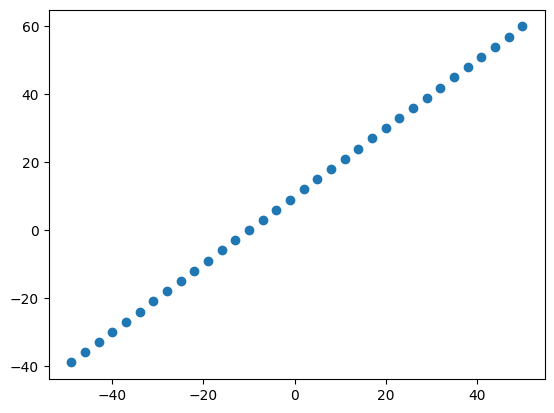

In [2]:
# Create features
X = tf.constant(tf.range(-49, 51, delta=3))
X = X.numpy()
# Create labels
y = tf.constant(tf.range(-39, 61, 3))
y = y.numpy()
# Visualise datas
plt.scatter(X, y)

## 2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [3]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(34, 27, 7)

### Optimization for Accelerating Calculation Speed

In [4]:
X_train_int8 = tf.cast(x=X_train, dtype=tf.int8)
X_test_int8 = tf.cast(x=X_test, dtype=tf.int8)
y_train_int8 = tf.cast(x=y_train, dtype=tf.int8)
y_test_int8 = tf.cast(x=y_test, dtype=tf.int8)
X_train_int8, X_test_int8, y_train_int8, y_test_int8

(<tf.Tensor: shape=(27,), dtype=int8, numpy=
 array([-13,  47, -22, -49, -37,  -1,   2, -34, -10, -16, -46, -43,  41,
        -40,  38,  20,  44,  17,   5,  26, -31,  11,  50, -28, -19,  -7,
         35], dtype=int8)>,
 <tf.Tensor: shape=(7,), dtype=int8, numpy=array([ -4,   8,  32,  29, -25,  23,  14], dtype=int8)>,
 <tf.Tensor: shape=(27,), dtype=int8, numpy=
 array([ -3,  57, -12, -39, -27,   9,  12, -24,   0,  -6, -36, -33,  51,
        -30,  48,  30,  54,  27,  15,  36, -21,  21,  60, -18,  -9,   3,
         45], dtype=int8)>,
 <tf.Tensor: shape=(7,), dtype=int8, numpy=array([  6,  18,  42,  39, -15,  33,  24], dtype=int8)>)

### Build a model

In [5]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100, input_shape=[1]))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mean_absolute_error)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               200       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit a model

In [6]:
model.fit(X_train_int8, y_train_int8, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 646ms/step - loss: 24.9056 - mean_absolute_error: 24.9056
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 23.1185 - mean_absolute_error: 23.1185
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 21.3238 - mean_absolute_error: 21.3238
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 19.5625 - mean_absolute_error: 19.5625
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 17.8049 - mean_absolute_error: 17.8049
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 16.0818 - mean_absolute_error: 16.0818
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 14.3956 - mean_absolute_error: 14.3956
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7980 - mean_absolute_error: 12.7980
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 11.2705 - mean_absolute_error: 11.2705
Epoch 1

In [7]:
y_pred = model.predict(X_test_int8)


1/1 [==============================] - 0s 188ms/step


In [8]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth
  labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

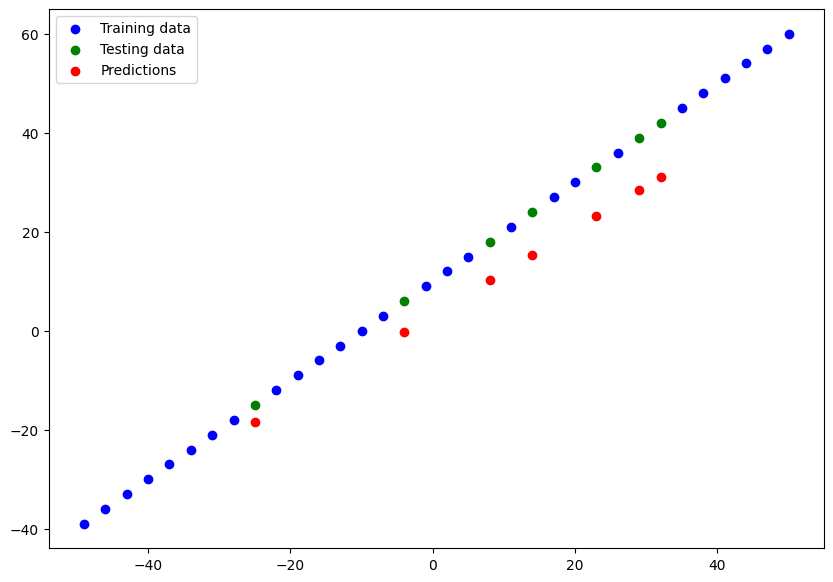

In [9]:
plot_predictions()

In [10]:
# Evaluate the model on the test
model.evaluate(X_test_int8, y_test_int8)

1/1 [==============================] - 0s 156ms/step - loss: 8.2144 - mean_absolute_error: 8.2144


[8.214422225952148, 8.214422225952148]

In [44]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [41]:
# Calculte model evaluation metrics
mae_ = mae(y_test, y_pred)
mse_ = mse(y_test, y_pred)
mae_, mse_

(<tf.Tensor: shape=(), dtype=float32, numpy=3161.3228>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43199564.0>)

Je constate que l'erreur diminue fortement en augmentant le nombre de données et en mettant 4 couches

## 3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* 3.1. Building a larger model (how does one with 4 dense layers go?).
* 3.2. Increasing the number of units in each layer.
* 3.3 Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* 3.4 What happens if you train for longer (say 300 epochs instead of 200)?


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Get datas

In [14]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Features visualization

* I see that age bmi and children are numerical values that I can normalize &rarr; **MinMaxScaler()**
* Charge must not be normalized because it is the target

In [15]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
def plot_column(data, column_identifier):
  if isinstance(data, pd.DataFrame):
    if isinstance(column_identifier, int):
      column_data = data.iloc[:, column_identifier]
    elif isinstance(column_identifier, str):
      column_data = data[column_identifier]
    else:
      raise ValueError("For a pandas DataFrame, the column identifier must be a numerical index or a column name.")
  elif isinstance(data, np.ndarray):
    if isinstance(column_identifier, int):
      column_data = data[:, column_identifier]
    else:
      raise ValueError("For a NumPy array, the column identifier must be a numerical index.")

  elif isinstance(data, tf.Tensor):
    data = data.numpy()
    if isinstance(column_identifier, int):
      column_data = data[:, column_identifier]
    else:
      raise ValueError("For a TensorFlow tensor, the column identifier must be a numerical index.")
  else:
    raise TypeError("The data must be a NumPy array, a pandas DataFrame, or a TensorFlow tensor.")

  if not isinstance(column_data, pd.Series):
    column_data = pd.Series(column_data)

  column_data.plot(kind='hist', title='Distribution of feature')
  plt.xlabel('Value')
  plt.ylabel('Frequency')
  plt.show()

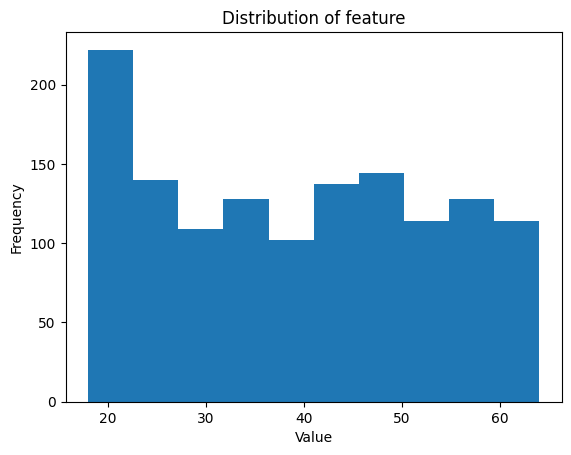

In [17]:
plot_column(data=insurance, column_identifier="age")

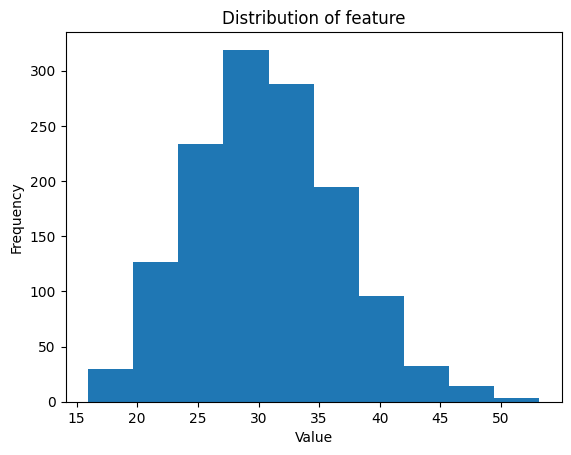

In [18]:
plot_column(data=insurance, column_identifier="bmi")

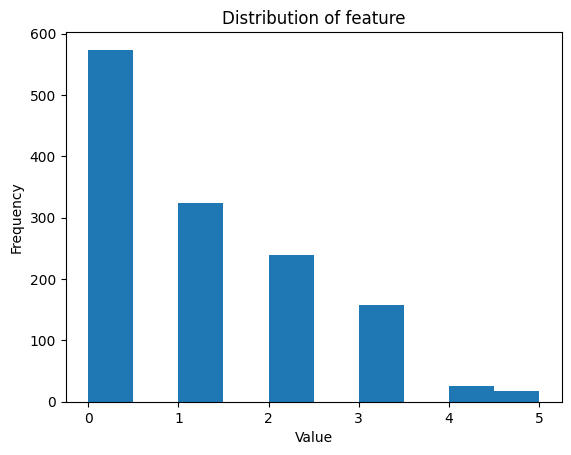

In [19]:
plot_column(data=insurance, column_identifier="children")

### Prepare datas

In [20]:
numerical_columns = ["age", "bmi", "children"]
categorical_columns = ["sex", "smoker", "region"]

In [21]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), numerical_columns),
    (OneHotEncoder(handle_unknown="ignore"), categorical_columns)
)

Comment: Using **handle_unknown='ignore'** with OneHotEncoder to ensure the transformer can handle new, unseen categories in future data by ignoring them, thus preventing errors during model predictions.


In [22]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Note: **Data Leakage**

Data leakage refers to the situation where information from the test dataset is directly or indirectly used during the training of the model. This can lead to overly optimistic performance estimates because the model has had access to information it shouldn't have during training. To avoid this, it is crucial to follow the correct sequence of operations:

1. **Data Splitting:** Split your dataset into training and test sets before any data manipulation or transformation.
2. **Fitting Transformations:** Fit transformations (such as normalization, encoding, etc.) only on the training set. This includes fitting scalers, encoders, and any other preprocessors.
3. **Applying Transformations:** Apply the fitted transformations to the training set. Then, transform the test set using the same parameters that were fitted on the training set.
4. **Build Model:** Train your model.
5. **Evaluation:** Evaluate the model's performance on the transformed test set to get a reliable estimate of its performance on new data.

By following this sequence, you ensure that your model is evaluated fairly, without benefiting from indirect information about the test data.

### Data Splitting

In [23]:
# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(1070, 268, 1070, 268)

### Fitting Transformations

In [25]:
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

### Applying Transformations

In [26]:
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [27]:
X_train_normal_tensor = tf.constant(X_train_normal, dtype=tf.float64)
y_train_tensor = tf.constant(y_train, dtype=tf.float64)
X_test_normal_tensor = tf.constant(X_test_normal, dtype=tf.float64)
y_test_tensor = tf.constant(y_test, dtype=tf.float64)

### Normalized features visualization

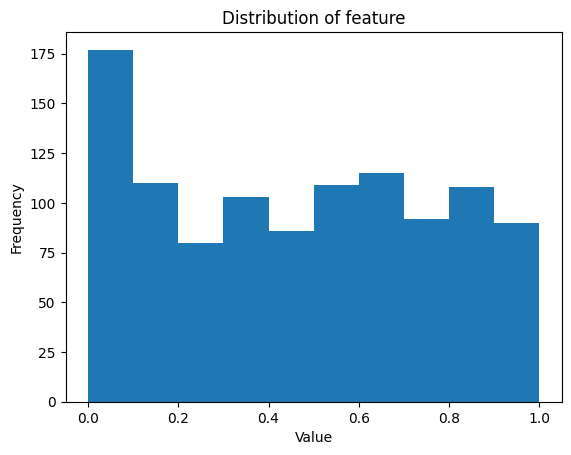

In [28]:
# age
plot_column(data=X_train_normal_tensor, column_identifier=0)

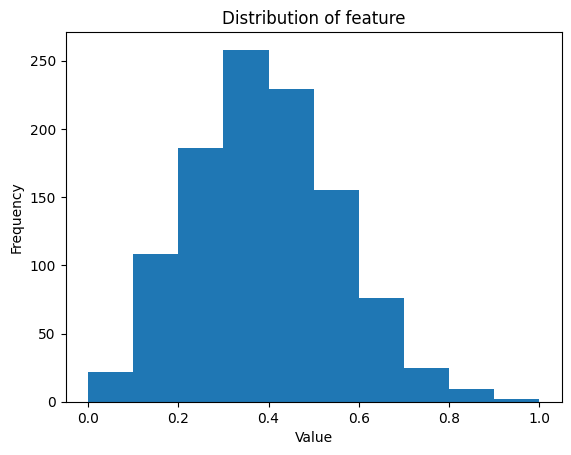

In [29]:
# bmi
plot_column(data=X_train_normal_tensor, column_identifier=1)

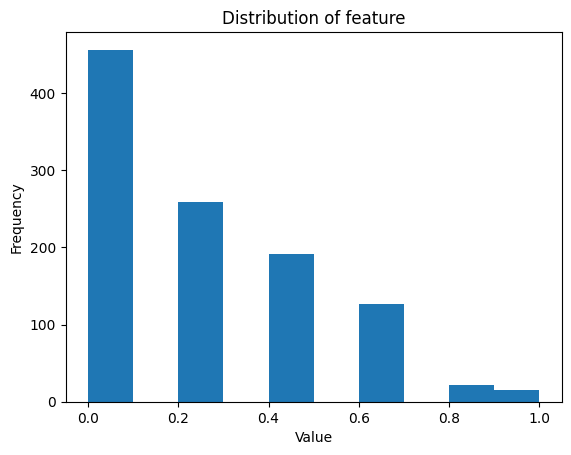

In [30]:
# children
plot_column(data=X_train_normal_tensor, column_identifier=2)

### Optimization for Accelerating Calculation Speed

I prefer not to reduce the type to avoid loss of precision

### 3.1. Building a larger model (how does one with 4 dense layers go?).

In [62]:
import tensorflow as tf

In [63]:
input_shape = X_train_normal_tensor.shape[1]
input_shape

11

In [64]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, input_shape=[input_shape]))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mean_absolute_error)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 128)               1536      
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dense_27 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10849 (42.38 KB)
Trainable params: 10849 (42.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Fit the model

In [65]:
model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13335.7793 - mean_absolute_error: 13335.7793
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13231.9238 - mean_absolute_error: 13231.9238
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 12672.1738 - mean_absolute_error: 12672.1738
Epoch 4/200
34/34 [==============================] - 0s 5ms/step - loss: 10940.9658 - mean_absolute_error: 10940.9658
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 8697.1973 - mean_absolute_error: 8697.1973
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 7947.5908 - mean_absolute_error: 7947.5908
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 7775.3213 - mean_absolute_error: 7775.3213
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7593.5801 - mean_absolute_error: 7593.5801
Epoch 9/200
34/34 [==============================] - 0s 3ms/step

In [66]:
y_pred = model.predict(X_test_normal_tensor)

9/9 [==============================] - 0s 1ms/step


In [67]:
y_pred

array([[ 9477.498  ],
       [ 6190.603  ],
       [44665.758  ],
       [ 9487.212  ],
       [32610.2    ],
       [ 5888.7446 ],
       [ 1330.3884 ],
       [13608.626  ],
       [ 3782.5305 ],
       [10421.948  ],
       [35973.082  ],
       [ 7984.7007 ],
       [ 4427.956  ],
       [41187.355  ],
       [43603.008  ],
       [40881.793  ],
       [10756.77   ],
       [40737.83   ],
       [ 8858.123  ],
       [39102.75   ],
       [ 4234.612  ],
       [ 8191.519  ],
       [  912.51   ],
       [ 3263.578  ],
       [11033.969  ],
       [11401.785  ],
       [12371.299  ],
       [ 5049.5513 ],
       [10075.06   ],
       [  757.59106],
       [ 8430.805  ],
       [11839.43   ],
       [ 2151.4094 ],
       [ 5347.421  ],
       [ 3156.1711 ],
       [ 8982.182  ],
       [ 2034.6971 ],
       [ 8029.0195 ],
       [41764.25   ],
       [37381.668  ],
       [ 3242.8572 ],
       [ 2579.2932 ],
       [11753.303  ],
       [11692.402  ],
       [ 5814.5825 ],
       [11

In [68]:
# Evaluate the model on the test
model.evaluate(X_test_normal_tensor, y_test_tensor)

9/9 [==============================] - 0s 3ms/step - loss: 3175.4956 - mean_absolute_error: 3175.4956


[3175.49560546875, 3175.49560546875]

In [69]:
# Calculte model evaluation metrics
mae_ = mae(y_test_tensor, y_pred)
mse_ = mse(y_test_tensor, y_pred)
mae_, mse_

(<tf.Tensor: shape=(), dtype=float32, numpy=3175.4956>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43282840.0>)

In [70]:
old_loss = 3438.6708984375
new_loss = 3161.19384765625
delta_loss = old_loss - new_loss
reduction_rate = delta_loss / old_loss
percent = reduction_rate *100
percent

8.069311050014498

I reduced the error by 8% by adding a layer of neurons

### 3.2. Increasing the number of units in each layer.

In [71]:
# Set random seed
tf.random.set_seed(42)

model_more_neurons = tf.keras.Sequential()
model_more_neurons.add(tf.keras.layers.Dense(256, input_shape=[input_shape]))
model_more_neurons.add(tf.keras.layers.Dense(128))
model_more_neurons.add(tf.keras.layers.Dense(64))
model_more_neurons.add(tf.keras.layers.Dense(1))

model_more_neurons.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mean_absolute_error)
model_more_neurons.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 256)               3072      
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 1)                 65        
                                                                 
Total params: 44289 (173.00 KB)
Trainable params: 44289 (173.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model_more_neurons.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 3ms/step - loss: 13314.1416 - mean_absolute_error: 13314.1416
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 12600.7939 - mean_absolute_error: 12600.7939
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 9298.7109 - mean_absolute_error: 9298.7109
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 7863.4282 - mean_absolute_error: 7863.4282
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 7505.9165 - mean_absolute_error: 7505.9165
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 7125.2847 - mean_absolute_error: 7125.2847
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 6591.1230 - mean_absolute_error: 6591.1230
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 5794.3403 - mean_absolute_error: 5794.3403
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - l

In [73]:
y_pred_more_neurons = model_more_neurons.predict(X_test_normal_tensor)

9/9 [==============================] - 0s 1ms/step


In [74]:
# Evaluate the model on the test
model_more_neurons.evaluate(X_test_normal_tensor, y_test_tensor)

9/9 [==============================] - 0s 2ms/step - loss: 3165.6021 - mean_absolute_error: 3165.6021


[3165.60205078125, 3165.60205078125]

In [75]:
# Calculte model evaluation metrics
mae_more_neurons = mae(y_test_tensor, y_pred_more_neurons)
mse_more_neurons = mse(y_test_tensor, y_pred_more_neurons)
mae_more_neurons, mse_more_neurons

(<tf.Tensor: shape=(), dtype=float32, numpy=3165.602>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43190732.0>)

No improvement by increasing the number of neurons

### 3.3. Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?

In [76]:
# Set random seed
tf.random.set_seed(42)

model_increase_lr = tf.keras.Sequential()
model_increase_lr.add(tf.keras.layers.Dense(128, input_shape=[input_shape]))
model_increase_lr.add(tf.keras.layers.Dense(64))
model_increase_lr.add(tf.keras.layers.Dense(16))
model_increase_lr.add(tf.keras.layers.Dense(1))

model_increase_lr.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=tf.keras.metrics.mean_absolute_error)
model_increase_lr.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 128)               1536      
                                                                 
 dense_33 (Dense)            (None, 64)                8256      
                                                                 
 dense_34 (Dense)            (None, 16)                1040      
                                                                 
 dense_35 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10849 (42.38 KB)
Trainable params: 10849 (42.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [77]:
model_increase_lr.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 11227.8672 - mean_absolute_error: 11227.8672
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 7355.3848 - mean_absolute_error: 7355.3848
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 4841.7080 - mean_absolute_error: 4841.7080
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 3792.3242 - mean_absolute_error: 3792.3242
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 3656.4932 - mean_absolute_error: 3656.4932
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 3622.9253 - mean_absolute_error: 3622.9253
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 3539.5938 - mean_absolute_error: 3539.5938
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 3596.7576 - mean_absolute_error: 3596.7576
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - los

In [78]:
y_pred_increase_lr = model_increase_lr.predict(X_test_normal_tensor)

9/9 [==============================] - 0s 1ms/step


In [85]:
# Evaluate the model on the test
model_increase_lr.evaluate(X_test_normal_tensor, y_test_tensor)

9/9 [==============================] - 0s 2ms/step - loss: 3179.7373 - mean_absolute_error: 3179.7373


[3179.7373046875, 3179.7373046875]

In [80]:
# Calculte model evaluation metrics
mae_increase_lr = mae(y_test_tensor, y_pred_increase_lr)
mse_increase_lr = mse(y_test_tensor, y_pred_increase_lr)
mae_increase_lr, mse_increase_lr

(<tf.Tensor: shape=(), dtype=float32, numpy=3179.7373>,
 <tf.Tensor: shape=(), dtype=float32, numpy=43738732.0>)

### 3.4. What happens if you train for longer (say 300 epochs instead of 200)?

In [82]:
# Set random seed
tf.random.set_seed(42)

model_increase_epochs = tf.keras.Sequential()
model_increase_epochs.add(tf.keras.layers.Dense(128, input_shape=[input_shape]))
model_increase_epochs.add(tf.keras.layers.Dense(64))
model_increase_epochs.add(tf.keras.layers.Dense(16))
model_increase_epochs.add(tf.keras.layers.Dense(1))

model_increase_epochs.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mean_absolute_error)
model_increase_epochs.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 128)               1536      
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 16)                1040      
                                                                 
 dense_39 (Dense)            (None, 1)                 17        
                                                                 
Total params: 10849 (42.38 KB)
Trainable params: 10849 (42.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [83]:
model_increase_epochs.fit(X_train_normal, y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 2ms/step - loss: 13336.4766 - mean_absolute_error: 13336.4766
Epoch 2/300
34/34 [==============================] - 0s 2ms/step - loss: 13229.2246 - mean_absolute_error: 13229.2246
Epoch 3/300
34/34 [==============================] - 0s 3ms/step - loss: 12639.0195 - mean_absolute_error: 12639.0195
Epoch 4/300
34/34 [==============================] - 0s 2ms/step - loss: 10834.1611 - mean_absolute_error: 10834.1611
Epoch 5/300
34/34 [==============================] - 0s 2ms/step - loss: 8578.2061 - mean_absolute_error: 8578.2061
Epoch 6/300
34/34 [==============================] - 0s 2ms/step - loss: 7883.3438 - mean_absolute_error: 7883.3438
Epoch 7/300
34/34 [==============================] - 0s 3ms/step - loss: 7705.1201 - mean_absolute_error: 7705.1201
Epoch 8/300
34/34 [==============================] - 0s 3ms/step - loss: 7515.9507 - mean_absolute_error: 7515.9507
Epoch 9/300
34/34 [==============================] - 0s 3ms/step

In [84]:
y_pred_increase_epochs = model_increase_epochs.predict(X_test_normal_tensor)

9/9 [==============================] - 0s 2ms/step


In [86]:
# Evaluate the model on the test
model_increase_epochs.evaluate(X_test_normal_tensor, y_test_tensor)

9/9 [==============================] - 0s 2ms/step - loss: 3173.6499 - mean_absolute_error: 3173.6499


[3173.64990234375, 3173.64990234375]

In [87]:
# Calculte model evaluation metrics
mae_increase_epochs = mae(y_test_tensor, y_pred_increase_epochs)
mse_increase_epochs = mse(y_test_tensor, y_pred_increase_epochs)
mae_increase_epochs, mse_increase_epochs

(<tf.Tensor: shape=(), dtype=float32, numpy=3173.65>,
 <tf.Tensor: shape=(), dtype=float32, numpy=42871572.0>)

In [88]:
model_results = [["model", mae_.numpy(), mse_.numpy()],
                 ["model_more_neurons", mae_more_neurons.numpy(), mse_more_neurons.numpy()],
                 ["model_increase_lr", mae_increase_lr.numpy(), mse_increase_lr.numpy()],
                 ["model_increase_epochs", mae_increase_epochs.numpy(), mse_increase_epochs.numpy()]]
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model,3175.495605,43282840.0
1,model_more_neurons,3165.602051,43190732.0
2,model_increase_lr,3179.737305,43738732.0
3,model_increase_epochs,3173.649902,42871572.0


Whether I increase the number of neurons or the learning rate or the number of epochs, the results vary very little.

## 4. Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

### Get Data & Data Splitting

In [92]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2, seed=113)

### Data Visulaization

In [144]:
X_train_df = pd.DataFrame(X_train)
X_train_df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### Fitting Transformations

In [147]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Build the model

In [163]:
input_shape = X_train_scaled.shape[1]
input_shape

13

In [165]:
# Set random seed
tf.random.set_seed(42)

model_boston = tf.keras.Sequential()
model_boston.add(tf.keras.layers.Dense(128, input_shape=[input_shape]))
model_boston.add(tf.keras.layers.Dense(64))
model_boston.add(tf.keras.layers.Dense(16))
model_boston.add(tf.keras.layers.Dense(1))

model_boston.compile(loss=tf.keras.losses.mean_absolute_error,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=tf.keras.metrics.mean_absolute_error)
model_boston.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               1792      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 16)                1040      
                                                                 
 dense_47 (Dense)            (None, 1)                 17        
                                                                 
Total params: 11105 (43.38 KB)
Trainable params: 11105 (43.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [166]:
model_boston.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 4ms/step - loss: 19.8433 - mean_absolute_error: 19.8433
Epoch 2/200
13/13 [==============================] - 0s 6ms/step - loss: 12.9431 - mean_absolute_error: 12.9431
Epoch 3/200
13/13 [==============================] - 0s 6ms/step - loss: 8.8630 - mean_absolute_error: 8.8630
Epoch 4/200
13/13 [==============================] - 0s 4ms/step - loss: 7.6456 - mean_absolute_error: 7.6456
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 6.3375 - mean_absolute_error: 6.3375
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 5.4916 - mean_absolute_error: 5.4916
Epoch 7/200
13/13 [==============================] - 0s 2ms/step - loss: 5.2514 - mean_absolute_error: 5.2514
Epoch 8/200
13/13 [==============================] - 0s 3ms/step - loss: 5.2194 - mean_absolute_error: 5.2194
Epoch 9/200
13/13 [==============================] - 0s 4ms/step - loss: 4.9403 - mean_absolute_error: 4.9403
Epoch 

In [168]:
y_pred_boston = model_boston.predict(X_test_scaled)

4/4 [==============================] - 0s 5ms/step


In [169]:
# Evaluate the model on the test
model_boston.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 9ms/step - loss: 6.7100 - mean_absolute_error: 6.7100


[6.710011005401611, 6.710011005401611]

In [171]:
# Calculte model evaluation metrics
mae_boston = mae(y_test, y_pred_boston)
mse_boston = mse(y_test, y_pred_boston)
mae_boston, mse_boston

(<tf.Tensor: shape=(), dtype=float32, numpy=6.710011>,
 <tf.Tensor: shape=(), dtype=float32, numpy=61.585827>)

With a larger dataset, we can reduce the error